In [401]:
import tweepy
import requests
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import numpy as np

## Gather

In [402]:
#read twitter archive.csv file
archive=pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [403]:
# import image-prediction.csv file using request libary
url=('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r = requests.get(url)
r.status_code

200

In [404]:
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(r.content)

In [405]:
# load the image prediction table
image_df=pd.read_csv("image-predictions.tsv", sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [406]:
favorite_df = []
with open('tweet-json copy', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        favorite_df.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count'],
                             'timestamp': json_data['created_at']})
fav_tweet_df = pd.DataFrame(favorite_df, columns=['tweet_id','favorites','retweets','timestamp'])

In [407]:
# load the image favorite table
fav_tweet_df.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017


## Assess

In [408]:
# get info on the archive table
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [409]:
# get info on the image table
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [410]:
# get info on the favorite table
fav_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
timestamp    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


## Cleaning

### Quality Issues
1.twitter archive table: names column is not consistent, some names do not make sense e.g 'a', 'an' 'such' 

2.twitter archive table: There are missig values in, in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

3.the ID fields in all the three tables needs to be a string not a float

4.twitter archive table: The rating_numerator and rating_denominator can be a float

5.twitter archive table and fav_tweet table timestamp is a string when it should be Datetime type

6.twitter archive table: in_reply_to_user_id and in_reply_to_status_id are not original tweet

7: twitter archive table: The rating_numerator and rating_denominator needs to be converted to normalized ratings

8.for Tweet ID 835246439529840640, the rating 960/00 is not correct, should be 13/10
9.for Tweet ID 810984652412424192, the extracted ratings are 24/7 this is not correct. there should'nt be rating in this tweet
10.some dog breeds are capitalized while others are not in the algorithm columns
11.some names in the image_clean and archive table needs renaming in order to look presentable

### Tidiness Issues

1.twitter archive table: dog types are each in separate columns when it should be one stage column

2.twitter archive table:Some ratings are not correctly extracted

3.fav_tweet table:Time stamp occurs in both archive table and favorites table. We need just one!

4.ratngs needs to be in a single column 

In [411]:
# make a copy of the archive table
archive_clean=archive.copy()
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define

 drop rows with non empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

### code

In [412]:
# count retweets
archive_clean.retweeted_status_id.unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

In [413]:
clean_df=archive_clean[archive_clean.retweeted_status_id.isnull()==True].copy()

### Test

In [414]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Define


Replace non dog names with nan lower case

### Code

In [415]:

mask =clean_df.name.str.islower() 
column_name = 'name' 
clean_df.loc[mask, column_name] = np.nan

### Code

In [416]:
# check that there are non values in the name column
clean_df[clean_df['name'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,NaN,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,NaN,None,None,pupper,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,NaN,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,NaN,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,NaN,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,NaN,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,NaN,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,NaN,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,NaN,None,None,None,None


In [417]:
# check that there are non values in the name column
clean_df.name.isnull().sum()

104

### Define

convert timestamp string to datetime object

### Code

In [418]:
# Conert to datatime and chane variable name
clean_df['timestamp'] = pd.to_datetime(clean_df['timestamp'])

### Test

In [419]:
#check that the timestamp column is no longer a string
type(clean_df['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [420]:
#extract date only from date time
clean_df['timestamp'] = clean_df['timestamp'].dt.date

In [421]:
#rename timestamp as tweet_date
clean_df.rename(columns={'timestamp':'tweet_date'}, inplace=True)

In [422]:
# Convert to datatime variable name
clean_df['tweet_date'] = pd.to_datetime(clean_df['tweet_date'])

### Define

 extract the ratings column and convert to float

### code

In [423]:

rating = clean_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
clean_df['rating_numerator'] = rating['rating_numerator'].astype(float)
clean_df['rating_denominator'] = rating['rating_denominator'].astype(float)


### Test

In [424]:
# check that the ratings have been converted to float 
type(clean_df['rating_numerator'][0])
type(clean_df['rating_denominator'][0])

numpy.float64

### Define

make the rating numerator and rating denominator in to a sngle column and call it normalized ratings

### Code

In [425]:
# get the normaliized ratings
clean_df['normalized_ratings']=clean_df['rating_numerator']/clean_df['rating_denominator']

In [426]:
# drop the rating_denominator and rating_numerator column
clean_df.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

### Test

In [427]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
tweet_date                    2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
name                          2071 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
normalized_ratings            2175 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 368.9

### Define

convert ids'float to string in the archive table

### Code

In [428]:
clean_df[['tweet_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_user_id']] = archive_clean[['tweet_id','in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_user_id']].astype(str)

### Test

In [429]:
#check that the ids have all been coverted to string
type(clean_df['tweet_id'][0])
type(clean_df['in_reply_to_status_id'][0])
type(clean_df['retweeted_status_id'][0])
type(clean_df['retweeted_status_user_id'][0])
type(clean_df['in_reply_to_user_id'][0])

str

### Define

Join the dog stages into one column and replace those wihout name with 'unknown'

### Code

In [430]:
clean_df.doggo.replace('None', '', inplace=True)
clean_df.doggo.replace(np.NaN, '', inplace=True)
clean_df.floofer.replace('None', '', inplace=True)
clean_df.floofer.replace(np.NaN, '', inplace=True)
clean_df.pupper.replace('None', '', inplace=True)
clean_df.pupper.replace(np.NaN, '', inplace=True)
clean_df.puppo.replace('None', '', inplace=True)
clean_df.puppo.replace(np.NaN, '', inplace=True)

In [431]:
clean_df['dog_stages'] = clean_df.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [432]:
clean_df['dog_stages'] = clean_df.doggo + clean_df.floofer + clean_df.pupper + clean_df.puppo
clean_df.loc[clean_df.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
clean_df.loc[clean_df.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
clean_df.loc[clean_df.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

In [433]:
clean_df.loc[clean_df.dog_stages == '', 'dog_stages'] = np.nan

In [434]:
clean_df.dog_stages=clean_df.dog_stages.fillna('Unknown')


### Test

In [435]:
clean_df.dog_stages.value_counts()

Unknown           1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stages, dtype: int64

In [436]:
# delete the original columns
clean_df.drop(['doggo', 'pupper','floofer', 'puppo'], axis=1, inplace=True)

In [437]:
#test
clean_df.dog_stages.value_counts()

Unknown           1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stages, dtype: int64

### Define

In [ ]:
# drop the reweet Ids

In [438]:
clean_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' ], axis=1, inplace=True)

In [311]:
# check to see that retweets have been dropped
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
tweet_date            2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2071 non-null object
dog_stages            2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 169.9+ KB


In [439]:
clean_df.shape[0]

2175

In [440]:
#make a copy of the image table for cleaning purposes
image_clean=image_df.copy()
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### convert tweet id in the image prediction table to string

In [441]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

In [442]:
# check that the tweet_id is str
type(image_clean['tweet_id'][0])

str

###  Define

Rename img_num, and the algorithms

###  Code

In [443]:
image_clean.rename(columns={'img_num':'image_number', 'p1':'algorithm_1', 'p1_conf':'algorithm1_confident','p1_dog':'algorithm1_prediction',
                    'p2':'algorithm_2', 'p2_conf':'algorithm2_confident','p2_dog':'algorithm2_prediction',  
                            'p3':'algorithm_3', 'p3_conf':'algorithm3_confident','p3_dog':'algorithm3_prediction', 
                           }, inplace=True)

###  Test

In [444]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                 2075 non-null object
jpg_url                  2075 non-null object
image_number             2075 non-null int64
algorithm_1              2075 non-null object
algorithm1_confident     2075 non-null float64
algorithm1_prediction    2075 non-null bool
algorithm_2              2075 non-null object
algorithm2_confident     2075 non-null float64
algorithm2_prediction    2075 non-null bool
algorithm_3              2075 non-null object
algorithm3_confident     2075 non-null float64
algorithm3_prediction    2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define

 capitalize the first letter of the dog breeds in the algoritm columns

### Code

In [445]:
image_clean.algorithm_1 = image_clean.algorithm_1.str.title()
image_clean.algorithm_2 = image_clean.algorithm_2.str.title()
image_clean.algorithm_3 = image_clean.algorithm_3.str.title()

### Test

In [446]:
image_clean.algorithm_1.str.istitle().value_counts()

True    2075
Name: algorithm_1, dtype: int64

In [447]:
image_clean.algorithm_2.str.istitle().value_counts()

True    2075
Name: algorithm_2, dtype: int64

In [448]:
image_clean.algorithm_3.str.istitle().value_counts()

True    2075
Name: algorithm_3, dtype: int64

In [449]:
# make a copy of the favorites table for cleaning
fav_tweet_clean=fav_tweet_df.copy()
fav_tweet_clean.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017


### Convert tweet_id on the favorite table to str

In [450]:
#code
fav_tweet_clean['tweet_id'] = fav_tweet_clean['tweet_id'].astype(str)

In [451]:
#check that the tweet_id is str
type(fav_tweet_clean['tweet_id'][0])

str

### Define

drop time stamp in the favorites table since same as that on the archive

### Code

In [452]:
# drop time stamp in the favorites table since same as that on the archive
fav_tweet_clean.drop(['timestamp'], axis=1, inplace=True)

### Test

In [453]:
fav_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Define 

rename retweets and favorites column in fav_tweet_clean table

### Code

In [454]:
fav_tweet_clean.rename(columns={'favorites':'favorite_count', 'retweets':'retweet_count'}, inplace=True)

### Test

In [455]:
fav_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [456]:
# Merge  archive and fav_tweet_clean dataframes
df_1=pd.merge(clean_df, fav_tweet_clean, on='tweet_id', how='inner')

In [457]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id              2175 non-null object
tweet_date            2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
name                  2071 non-null object
normalized_ratings    2175 non-null float64
dog_stages            2175 non-null object
favorite_count        2175 non-null int64
retweet_count         2175 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 186.9+ KB


In [458]:
# Merge df_1 with the image_clean dataframes to obtain final dataframes
df_final=pd.merge(df_1, image_clean, on='tweet_id', how='inner')

In [459]:
# save dataframe to csv file
df_final.to_csv('twitter_archive_master.csv', index=False)

In [475]:
df_final.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id                 1994 non-null object
tweet_date               1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1896 non-null object
normalized_ratings       1994 non-null float64
dog_stages               1994 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
image_number             1994 non-null int64
algorithm_1              1994 non-null object
algorithm1_confident     1994 non-null float64
algorithm1_prediction    1994 non-null bool
algorithm_2              1994 non-null object
algorithm2_confident     1994 non-null float64
algorithm2_prediction    1994 non-null bool
algorithm_3              1994 non-null object
algorithm3_conf

### Most retweeted 

In [461]:

most_retweeted = df_final[df_final["retweet_count"] == df_final["retweet_count"].max()]
most_retweeted

,tweet_id,tweet_date,source,text,expanded_urls,name,normalized_ratings,dog_stages,favorite_count,retweet_count,...,image_number,algorithm_1,algorithm1_confident,algorithm1_prediction,algorithm_2,algorithm2_confident,algorithm2_prediction,algorithm_3,algorithm3_confident,algorithm3_prediction
775,744234799360020481,2016-06-18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,1.3,doggo,131075,79515,...,1,Labrador_Retriever,0.825333,True,Ice_Bear,0.044681,False,Whippet,0.018442,True


In [462]:
most_retweeted['jpg_url']

775    https://pbs.twimg.com/ext_tw_video_thumb/74423...
Name: jpg_url, dtype: object

In [463]:
most_retweeted['expanded_urls']

775    https://twitter.com/dog_rates/status/744234799...
Name: expanded_urls, dtype: object

### Most frequent dog_stage

In [464]:
df_final['dog_stages'].mode()[0]

'Unknown'

The most frequent dog stage is pupper

### Most frequent breed

In [465]:
df_final['algorithm_1'].mode()[0]

'Golden_Retriever'

In [498]:
df_final['algorithm_2'].mode()[0]

'Labrador_Retriever'

In [499]:
df_final['algorithm_3'].mode()[0]

'Labrador_Retriever'

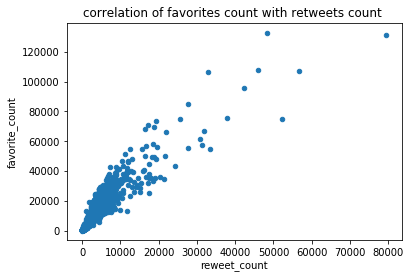

In [466]:
#scatter plot of favorites vs retweets counts
df_final.plot(kind='scatter',x='retweet_count',
y='favorite_count')
plt.xlabel('reweet_count')
plt.ylabel( 'favorite_count')
plt.title('correlation of favorites count with retweets count ');

There is a positive correlation betwween the number of retweets and favorites

### What is the favorites tweet

In [467]:
most_favorites= df_final[df_final["favorite_count"] == df_final["favorite_count"].max()]
most_favorites

,tweet_id,tweet_date,source,text,expanded_urls,name,normalized_ratings,dog_stages,favorite_count,retweet_count,...,image_number,algorithm_1,algorithm1_confident,algorithm1_prediction,algorithm_2,algorithm2_confident,algorithm2_prediction,algorithm_3,algorithm3_confident,algorithm3_prediction
309,822872901745569793,2017-01-21,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,None,1.3,puppo,132810,48265,...,1,Lakeland_Terrier,0.196015,True,Labrador_Retriever,0.160329,True,Irish_Terrier,0.069126,True


In [468]:
most_favorites['jpg_url']

309    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

In [469]:
most_favorites['expanded_urls']

309    https://twitter.com/dog_rates/status/822872901...
Name: expanded_urls, dtype: object

### Which tweet has the best ratings

In [470]:
best_ratings= df_final[df_final["normalized_ratings"] == df_final["normalized_ratings"].max()]
best_ratings

,tweet_id,tweet_date,source,text,expanded_urls,name,normalized_ratings,dog_stages,favorite_count,retweet_count,...,image_number,algorithm_1,algorithm1_confident,algorithm1_prediction,algorithm_2,algorithm2_confident,algorithm2_prediction,algorithm_3,algorithm3_confident,algorithm3_prediction
726,749981277374128128,2016-07-04,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,177.6,Unknown,5569,2772,...,1,Bow_Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False


In [471]:
best_ratings['jpg_url']

726    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [472]:
best_ratings['expanded_urls']

726    https://twitter.com/dog_rates/status/749981277...
Name: expanded_urls, dtype: object

All visualization and insight were obtained from the final dataframe

### Which of the  algorithms produce more successess

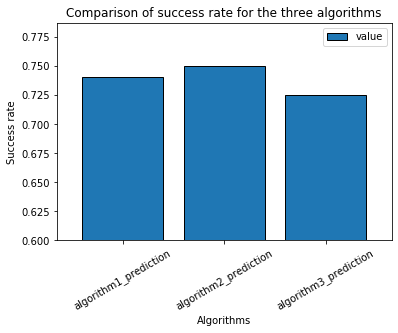

In [497]:
#groupby variable(i.e. the colomn names), get the average
df_final[['algorithm2_prediction', 'algorithm1_prediction', 'algorithm3_prediction']].melt().groupby('variable').mean().plot.bar(rot=0, width=0.8, edgecolor='black');
plt.ylim(0.6,None)
plt.title('Comparison of success rate for the three algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Success rate')
plt.xticks(rotation=30);

The  number 2 algorithm seems to be produce more succesess, with algorithm number the least